In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import segyio

# DATOS SEAM I

## Well logs

In [2]:
# explorar el archivo ASCII
with open ("Wells/Density.Well.1",'rt') as f:
    print(f.readline())
    print(f.readline())

       0   1.030

      10   1.030



In [3]:
#Cargar los archivos ASCII como un dataFrame de Pandas
w1den=pd.read_csv("Wells/Density.Well.1",header=None,names=['depth','density'],
                   delim_whitespace=True)
w2den=pd.read_csv("Wells/Density.Well.2",header=None,names=['depth','density'],
                   delim_whitespace=True)
w3den=pd.read_csv("Wells/Density.Well.3",header=None,names=['depth','density'],
                   delim_whitespace=True)
w4den=pd.read_csv("Wells/Density.Well.4",header=None,names=['depth','density'],
                   delim_whitespace=True)
w5den=pd.read_csv("Wells/Density.Well.5",header=None,names=['depth','density'],
                  
                   delim_whitespace=True)
w1vp=pd.read_csv("Wells/Vp.Well.1",header=None,names=['depth','vp'],
                   delim_whitespace=True)
w2vp=pd.read_csv("Wells/Vp.Well.2",header=None,names=['depth','vp'],
                   delim_whitespace=True)
w3vp=pd.read_csv("Wells/Vp.Well.3",header=None,names=['depth','vp'],
                   delim_whitespace=True)
w4vp=pd.read_csv("Wells/Vp.Well.4",header=None,names=['depth','vp'],
                   delim_whitespace=True)
w5vp=pd.read_csv("Wells/Vp.Well.5",header=None,names=['depth','vp'],
                   delim_whitespace=True)

w1vs=pd.read_csv("Wells/VsElasticOriginal.Well.1",header=None,names=['depth','vs'],
                   delim_whitespace=True)
w2vs=pd.read_csv("Wells/VsElasticOriginal.Well.2",header=None,names=['depth','vs'],
                   delim_whitespace=True)
w3vs=pd.read_csv("Wells/VsElasticOriginal.Well.3",header=None,names=['depth','vs'],
                   delim_whitespace=True)
w4vs=pd.read_csv("Wells/VsElasticOriginal.Well.4",header=None,names=['depth','vs'],
                   delim_whitespace=True)
w5vs=pd.read_csv("Wells/VsElasticOriginal.Well.5",header=None,names=['depth','vs'],
                   delim_whitespace=True)                                                     

w1phit=pd.read_csv("Wells/PorosityTotal.Well.1",header=None,names=['depth','phit'],
                   delim_whitespace=True)
w2phit=pd.read_csv("Wells/PorosityTotal.Well.2",header=None,names=['depth','phit'],
                   delim_whitespace=True)
w3phit=pd.read_csv("Wells/PorosityTotal.Well.3",header=None,names=['depth','phit'],
                   delim_whitespace=True)
w4phit=pd.read_csv("Wells/PorosityTotal.Well.4",header=None,names=['depth','phit'],
                   delim_whitespace=True)
w5phit=pd.read_csv("Wells/PorosityTotal.Well.5",header=None,names=['depth','phit'],
                   delim_whitespace=True)


In [4]:
#Unir dataframe
w1=w1den.merge(w1vp, on=['depth'])
w1=w1.merge(w1vs, on=['depth'])
w1=w1.merge(w1phit, on=['depth'])

w2=w2den.merge(w2vp, on=['depth'])
w2=w2.merge(w2vs, on=['depth'])
w2=w2.merge(w2phit, on=['depth'])

w3=w3den.merge(w3vp, on=['depth'])
w3=w3.merge(w3vs, on=['depth'])
w3=w3.merge(w3phit, on=['depth'])

w4=w4den.merge(w4vp, on=['depth'])
w4=w4.merge(w4vs, on=['depth'])
w4=w4.merge(w4phit, on=['depth'])

w5=w5den.merge(w5vp, on=['depth'])
w5=w5.merge(w5vs, on=['depth'])
w5=w5.merge(w5phit, on=['depth'])


In [5]:
# Generar un solo dataframe
well_14=pd.concat([w1,w2,w3,w4])

In [6]:
#Generar uno nuevo index
well_14.reset_index(drop=True, inplace=True)

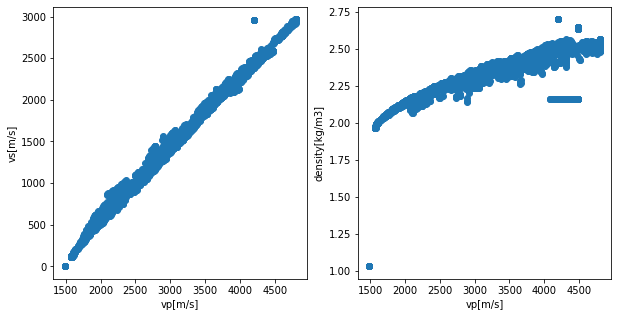

In [8]:
# Graficar variables independientes
fig,(x1,x2)=plt.subplots(1,2, figsize=(10,5))
x1.scatter(x=well_14.vp, y=well_14.vs)
x2.scatter(x=well_14.vp, y=well_14.density)
x1.set_xlabel("vp[m/s]")
x1.set_ylabel("vs[m/s]")
x2.set_xlabel("vp[m/s]")
x2.set_ylabel("density[kg/m3]");

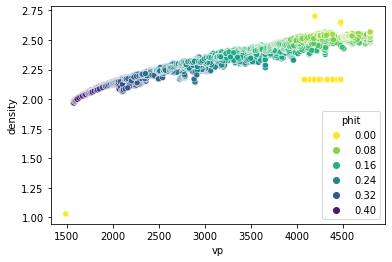

In [10]:
sns.scatterplot(data=well_14, x='vp', y='density', hue='phit', palette='viridis_r');

In [9]:
#Filtrar datos
filter_1=well_14[(well_14.vp<1500) | (well_14.density>2.6)].index
filter_2=well_14[(well_14.vp>4000) & (well_14.density<2.2) ].index
filterAll=filter_1.append(filter_2)

In [11]:
#Generar un dataframe con los datos filtrados
well_14f=well_14.drop(filterAll,axis=0)

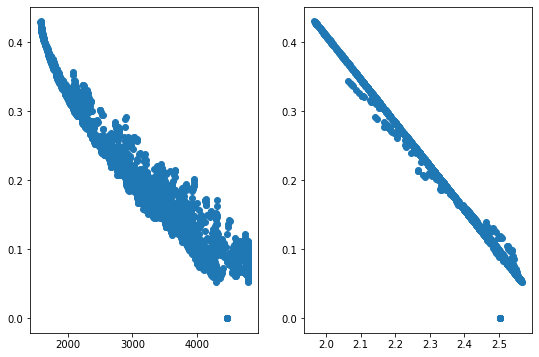

In [13]:
fig,ax=plt.subplots(1,2, figsize=(9,6))
ax[0].scatter(x=well_14f.vp, y=well_14f.phit)
ax[1].scatter(x=well_14f.density, y=well_14f.phit);

In [14]:
#Calculo Regresion Lineal
X=well_14f[['vp', 'density']]
y=well_14f['phit']
reg=LinearRegression().fit(X,y)


In [15]:
#Resultados de la regresión lineal

reg.score(X,y)

0.9955694854455395

In [16]:
reg.coef_

array([-2.17664959e-06, -6.11839155e-01])

In [17]:
reg.intercept_

1.6337159189795427

In [21]:
#Evaluar 
def cal_phit(vp,density):
    if (vp<1500) | (density>2.6): phit=0.00
    elif (vp>4000) & (density<2.2): phit=0.00
    else:
        phit=1.6337159189795427-2.17664959e-06*vp-0.611839155*density
        phit=round(phit,2)
    return phit
w5['phit_c']=w5[['vp','density']].apply(lambda x:cal_phit(x['vp'],x['density']), axis=1)

In [22]:
w5.head()

,depth,density,vp,vs,phit,phit_c
0,0,1.03,1490.0,0.0,0.0,0.0
1,10,1.03,1490.0,0.0,0.0,0.0
2,20,1.03,1490.0,0.0,0.0,0.0
3,30,1.03,1490.0,0.0,0.0,0.0
4,40,1.03,1490.0,0.0,0.0,0.0


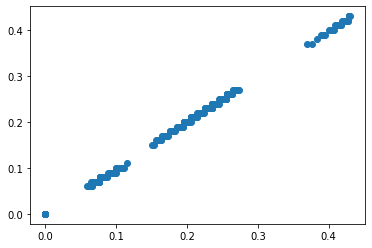

In [23]:
plt.scatter(w5.phit,w5.phit_c);

In [25]:
with segyio.open('SEAM_I_2D_Model/SEAM_Den_Elastic_N23900.sgy', ignore_geometry=True) as f:
    print(f.header.segy)
    print('-----------')
    print(f.trace[10])
    n_traces = f.tracecount
    twt = f.samples
    density2d = f.trace.raw[:]
with segyio.open('SEAM_I_2D_Model/SEAM_Vp_Elastic_N23900.sgy', ignore_geometry=True) as f:
    print(f.header.segy)
    print('-----------')
    print(f.trace[10])
    n_traces = f.tracecount
    twt = f.samples
    vp2d = f.trace.raw[:]

SegyFile SEAM_I_2D_Model/SEAM_Den_Elastic_N23900.sgy:
  inlines: None
  crosslines: None
  traces: 1751
  samples: [0.000e+00 1.000e+01 2.000e+01 ... 1.498e+04 1.499e+04 1.500e+04]
  float representation: 4-byte IBM float
-----------
[1.0299997 1.0299997 1.0299997 ... 2.6999998 2.6999998 2.6999998]
SegyFile SEAM_I_2D_Model/SEAM_Vp_Elastic_N23900.sgy:
  inlines: None
  crosslines: None
  traces: 1751
  samples: [0.000e+00 1.000e+01 2.000e+01 ... 1.498e+04 1.499e+04 1.500e+04]
  float representation: 4-byte IBM float
-----------
[1490. 1490. 1490. ... 4200. 4200. 4200.]


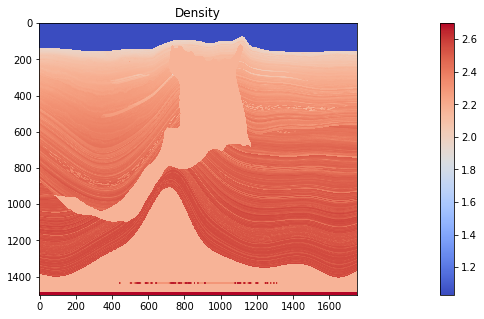

In [26]:
fig=plt.figure(figsize=(30,5))
plt.imshow(density2d.T, origin="upper", cmap='coolwarm', interpolation='nearest')
plt.title('Density')
plt.colorbar();

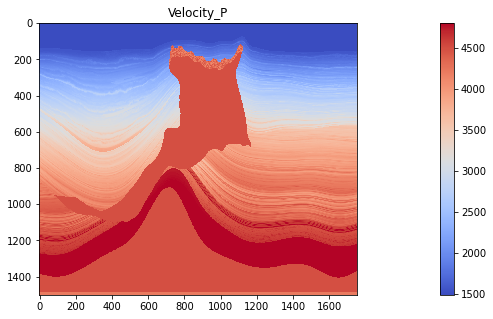

In [27]:
fig=plt.figure(figsize=(30,5))
plt.imshow(vp2d.T, origin="upper", cmap='coolwarm', interpolation='nearest')
plt.title('Velocity_P')
plt.colorbar();

In [41]:
density2d.shape

(1751, 1501)

In [42]:
phit2d=np.random.random((1751, 1501))
for cdp in range(density2d.shape[0]):
    for t in range(density2d.shape[1]):
        phit2d[cdp][t]=cal_phit(vp2d[cdp][t],density2d[cdp][t])

            
        

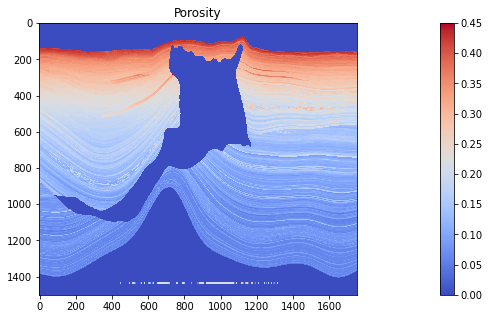

In [43]:
fig=plt.figure(figsize=(30,5))
plt.imshow(phit2d.T, origin="upper", cmap='coolwarm', interpolation='nearest')
plt.title('Porosity')
plt.colorbar();